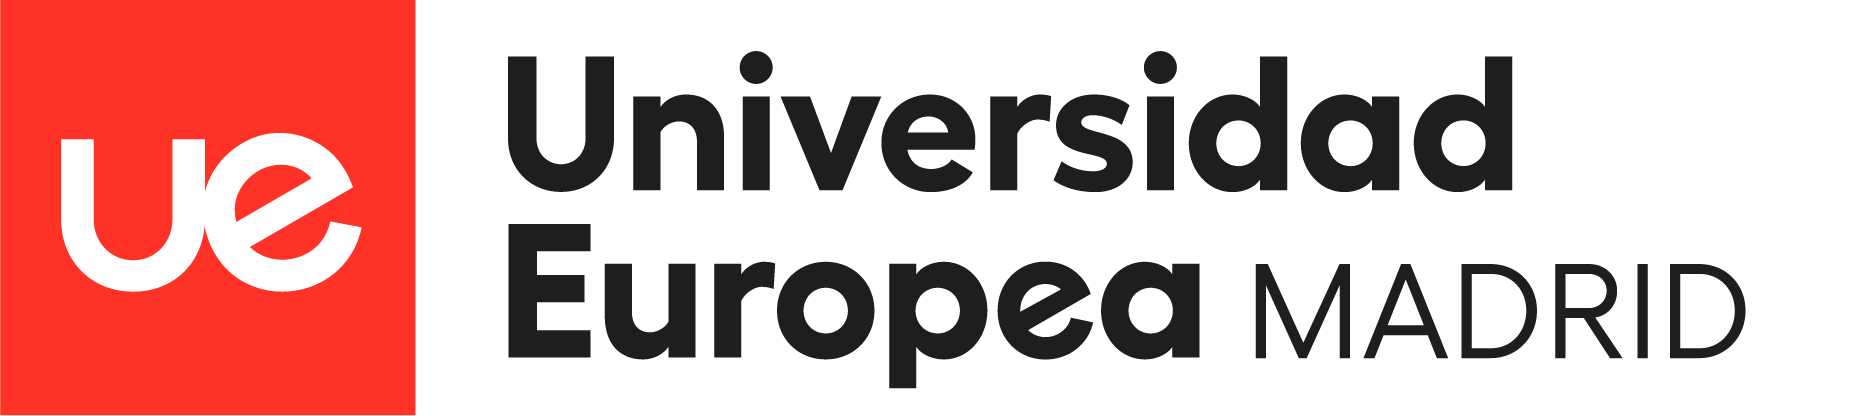


# MÓDULO III: FUNDAMENTOS TECNOLÓGICOS EN DATA SCIENCE
##  Actividad 2: Python

#### Autor : Iván Reyes Laguna                             
#### Nº expediente: 222C2974
#### Fecha de entrega: 28/01/2023

# Actividad 2: Python

La siguiente actividad debe ser realizada por todo el alumnado siguiendo las instrucciones de cada ejercicio.

Las soluciones de cada ejercicio deben contener el código con el que han sido obtenidas. La indicación de un resultado sin el código correspondiente no será un ejercicio/apartado evaluable.

Recuerda incluir todos los comentarios que consideres oportunos en tus códigos. Y que cuando generes una función debes utilizar el `Docstring` de forma que se pueda consultar la información y opciones de la función.

Las respuestas las cuestiones deben estar explícitamente indicadas y todo el código debe ser visible.

* Ejercicio 2.1: 1,5 puntos.
* Ejercicio 2.2: 1,25 puntos.
* Ejercicio 2.3: 0,75 puntos.
* Ejercicio 2.4: 1,5 puntos.
* Ejercicio 2.5: 2,75 puntos.
* Ejercicio 2.6: 2,25 puntos.

Esta actividad supone un 60% de la nota final del módulo de Python.

La actividad debe ser entregada en formato preferiblemente `ipynb` y el nombre del archivo debe ser `PRIMER_APELLIDO_NOMBRE_ACTIVIDAD02` todo en mayúsculas.

### <font color='red'> La fecha máxima de entrega es el día 28 de enero de 2023. </font>



## **Cargar librerias**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### Descripción de los datos a utilizar
El archivo de datos a utilizar en la actividad es `tarjetas.txt`.
Este archivo contiene información relativa a contratos de tarjetas de crédito de diferentes clientes de una empresa, e incluye los siguientes campos:
* __idcliente:__ Código de dentificación interno de cada cliente, es un código único por cliente.
* __idcontrato:__ Código de identificación del contrato.
* __producto:__ Tipo de producto de la tarjeta. Los productos son: A, B y C.
* __limite:__ Importe máximo del que puede disponer un cliente en la tarjeta.
* __dispuesto:__ Importe dispuesto en la tarjeta.
* __disponible:__ Importe que queda disponible en la tarjeta.
* __contacto_cliente:__ Estado del último contacto telefónico realizado al cliente. Toma tres valores:
    * 0: Rechaza volver a ser contactado.
    * 1: Contacto no conseguido.
    * 2: Contacto realizado.
* __Impago:__ Situación contable de la tarjeta:
    * 0: Fallido.
    * 1: Impago.
    * 2: Dudoso.
    * 3: Normal.
* __tipo:__ Indica el tipo de interés trimestral al que se cobra cada producto:
    * Producto A: 18.75.
    * Producto B: 10.25.
    * Producto C: 6.33.

El archivo contiene encabezados, un índice, los campos están separados por un tabulador y el separador decimal es la coma.
    


### Ejercicio 2.1: 
**2.1.1 Lee el fichero de datos `tarjetas.txt` y almacena la información en un `dataframe` de Pandas (llámalo `df`) y comprueba los registros que tiene el archivo.**

**2.1.2 ¿Cuántos clientes distintos existen?**

**2.1.3 ¿Qué cliente es el que tiene un mayor número contratos? Indica su `idcliente`, en caso de existir más de uno indica todos los id. ¿Cuántos contratos tiene/n este/os cliente/s**

**2.1.4 ¿Cuántos contratos hay de que cada tipo de producto?**

**2.1.5 Crea una nueva variable llamada `contacto_str` en que se haya sustituido sus valores por los siguientes textos:**
+ Valor 0: rechazado
+ Valor 1: ausente
+ Valor 2: contactado

**2.1.6 Crea una nueva variable llamada `pct_uso` que indique el porcentaje de utilización calculado como el cociente de `dispuesto` y `limite` en tantos por uno.** 

**2.1.7¿Cúantas tarjetas hay que se encuentren en situciacón de sobredisposición, es decir, que tengan un porcentaje de uso superior a 1?**

**2.1.8 ¿Cuál es el límite mínimo, máximo y medio por producto? Muéstralo en un único dataframe.**

**2.1.1 Lee el fichero de datos `tarjetas.txt` y almacena la información en un `dataframe` de Pandas (llámalo `df`) y comprueba los registros que tiene el archivo.**

In [2]:
# Lectura del archivo
df = pd.read_csv('tarjetas.txt', sep='\t', decimal=',')
# Comprobación de los registros
print(df.shape) # Imprime la cantidad de filas y columnas del DataFrame
df

(1589012, 10)


,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25
...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75


**2.1.2 ¿Cuántos clientes distintos existen?**


In [3]:
clientes = df.idcliente.unique()
print(f'Existen {len(clientes)} clientes distintos')

Existen 795369 clientes distintos


**2.1.3 ¿Qué cliente es el que tiene un mayor número contratos? Indica su `idcliente`, en caso de existir más de uno indica todos los id. ¿Cuántos contratos tiene/n este/os cliente/s**

In [4]:
contratos_por_cliente = df.groupby('idcliente').size().reset_index(name='contratos')
contratos_por_cliente = contratos_por_cliente.sort_values(by='contratos', ascending=False)
contratos_por_cliente

,idcliente,contratos
38067,12393899,11
402906,12852593,11
391350,12838009,10
111427,12485918,10
105708,12478786,10
...,...,...
524240,13005046,1
219811,12622333,1
524237,13005043,1
524236,13005042,1


In [5]:
# obtener el cliente con el máximo número de contratos
cliente_mas_contratos = contratos_por_cliente.loc[contratos_por_cliente['contratos'] == contratos_por_cliente['contratos'].max(), 'idcliente']
# imprimir el/los cliente/s y su/s id y el numero de contratos
print(f'Los clientes con más contratos eson: {cliente_mas_contratos} con {contratos_por_cliente.contratos.max()} contratos')

Los clientes con más contratos eson: 38067     12393899
402906    12852593
Name: idcliente, dtype: int64 con 11 contratos


**2.1.4 ¿Cuántos contratos hay de que cada tipo de producto?**

In [6]:
contratos_por_producto = df.groupby('producto').size().reset_index(name='contratos')
print(contratos_por_producto)

  producto  contratos
0        A     483106
1        B    1098551
2        C       7355


**2.1.5 Crea una nueva variable llamada `contacto_str` en que se haya sustituido sus valores por los siguientes textos:**
+ Valor 0: rechazado
+ Valor 1: ausente
+ Valor 2: contactado

In [7]:
df['contacto_str'] = df['contacto_cliente'].replace({0: 'rechazado', 1: 'ausente', 2: 'contactado'})
print(df.contacto_str)

0          contactado
1          contactado
2          contactado
3             ausente
4          contactado
              ...    
1589007    contactado
1589008       ausente
1589009    contactado
1589010    contactado
1589011    contactado
Name: contacto_str, Length: 1589012, dtype: object


**2.1.6 Crea una nueva variable llamada `pct_uso` que indique el porcentaje de utilización calculado como el cociente de `dispuesto` y `limite` en tantos por uno.** 

In [8]:
df['pct_uso'] = df['dispuesto']/df['limite']*100
print(df.pct_uso)

0           5.968889
1           8.305455
2          37.895625
3          18.442000
4          29.282941
             ...    
1589007    66.850000
1589008    22.414167
1589009    22.651765
1589010    52.560000
1589011    52.396250
Name: pct_uso, Length: 1589012, dtype: float64


**2.1.7¿Cúantas tarjetas hay que se encuentren en situciacón de sobredisposición, es decir, que tengan un porcentaje de uso superior a 1?**

In [9]:
tarjetas_sobredisposicion = df.query('pct_uso > 1').count()['pct_uso']
print(f'Hay {tarjetas_sobredisposicion} tarjetas en situación de sobredisposición')

Hay 1571523 tarjetas en situación de sobredisposición


**2.1.8 ¿Cuál es el límite mínimo, máximo y medio por producto? Muéstralo en un único dataframe.**

In [10]:
limites_por_producto = df.groupby('producto')['limite'].agg(['min', 'max', 'mean'])
print(limites_por_producto)

             min      max         mean
producto                              
A          500.0  14900.0  1851.049666
B          500.0  14800.0  1258.262839
C         3100.0  13200.0  4052.209381


### Ejercicio 2.2:
**2.2.1. Ya que existe un número determinado de clientes que han rechazado el contacto, genera un nuevo `dataframe` sin estos clientes llamado `df_fil` que sea una copia de `df`.**

**2.2.2 Por cuestiones de calidad se ha detectado que existen contratos con un tipo de interés que no es uno de los estipulados para cada producto. Sobre df_fil genera una nueva variable llamada tipo_corr que tenga el tipo de interés correcto para cada producto ¿cuántos casos con tipo incorrecto hay?**

**2.2.3 Sobre `df_fil` realiza las siguientes comprobaciones:**
+ ¿Sobre los clientes contactados cual es el producto mayoritario?
+ ¿que porcentaje de tarjetas se encuentran en situación de Impago?

**Se considera que la cartera se encuentra en situación sostenible si el porcentaje de tarjetas en situación contable `dudoso` y `normal` supera el 80% del total de tarjetas ¿se verifica esta condición?**

 **Para la empresa el importe dispuesto de cada tarjeta genera un coste que depende de la situación contable:**
   + Fallido: 120%.
   + Impago: 100%.
   + Dudoso: 10%
   + Normal: 0%
   
**¿Cual es el coste total que supone a la empresa esta cartera?** 

**2.2.4 Cada tarjeta trae asociado un coste para el titular de la tarjeta, existen varios tipos de costes que se detallan a continuación:**


+ _Coste por disposición:_ Es el coste que se calcula sobre el importe dispuesto, solo se aplica si se tiene un porcentaje dispuesto superior al 50% e inferior o igual al 100% y depende del producto, los porcentajes a aplicar son:
    +  1% para el producto A.
    + 3% para el producto B.
    + 0% para el producto C.
+ _Coste por sobre disposición:_ Es el coste que se calcula sobre el importe dispuesto por encima del límite:
    + 15% para el producto: A.
    + 10% para el producto: B.
    +  5% para el producto: C.
+ _Coste de no disposición:_ El coste de no disposición es el aplicado sobre el importe disponible siempre que el porcentaje de uso sea inferior al 20%. Y es:
    + 2% para las tarjetas sin importes dispuestos.
    + Para el resto de tarjetas un 0,15% por cada 5% dispuesto, es decir si es el porcentaje dispuesto está entre (0-5%] se asigna un 0,15% para ese tramo, si (5%-10%] se asigna un 0,30% un para ese tramo, etc.

+ _Coste global de mantenimiento:_ Este coste se asigna proporcionalmente según el porcentaje de uso de la tarjeta. Aplicando una comisión mínima del 1,23% sobre el límite de la tarjeta y un máximo del 3%.

    **Teniendo en cuenta lo anterior, crea una columna en `df_fil` que contenga el coste total por tarjeta, llámala `imp_comisiones`.**
    
**2.2.5 Crea un `dataframe` nuevo llamado `df_coste_cliente` que contenga para cada cliente el coste total de sus tarjetas (`imp_comisiones`) ¿Alguno de los clientes con mayor número de tarjetas (el obtenido en el ejercicio 2.1) es el que paga mayor importe en comisiones?**

**2.2.1. Ya que existe un número determinado de clientes que han rechazado el contacto, genera un nuevo `dataframe` sin estos clientes llamado `df_fil` que sea una copia de `df`.**

In [11]:
df_fil = df.query('contacto_cliente != 0')
print(df_fil)

         Unnamed: 0  idcliente    idcontrato  limite  dispuesto  disponible  \
0                 0   13208123  283921503774   900.0      53.72      848.83   
1                 1   13001708  847838228331  1100.0      91.36     1012.99   
2                 2   12518311  475803017773  1600.0     606.33     1022.55   
3                 3   12809806  706975222824   500.0      92.21      412.18   
4                 4   12948369  216147508550  1700.0     497.81     1225.90   
...             ...        ...           ...     ...        ...         ...   
1589007     1589007   13220348  533950224758  1200.0     802.20      436.00   
1589008     1589008   12528552  815525413876  1200.0     268.97      943.83   
1589009     1589009   13338376  417430364011  1700.0     385.08     1333.26   
1589010     1589010   12655633  732639882287  4900.0    2575.44     2447.20   
1589011     1589011   12884956  954450763169  1600.0     838.34      801.58   

         contacto_cliente  impago producto   tipo c

**2.2.2 Por cuestiones de calidad se ha detectado que existen contratos con un tipo de interés que no es uno de los estipulados para cada producto. Sobre df_fil genera una nueva variable llamada tipo_corr que tenga el tipo de interés correcto para cada producto ¿cuántos casos con tipo incorrecto hay?**

In [12]:
df_fil.loc[df_fil['producto'] == 'A', 'tipo_corr'] = 18.75
df_fil.loc[df_fil['producto'] == 'B', 'tipo_corr'] = 10.25
df_fil.loc[df_fil['producto'] == 'C', 'tipo_corr'] = 6.33

#contando casos con tipo incorrecto
tipo_incorrecto = (df_fil['tipo'] != df_fil['tipo_corr']).sum()
print(f'Hay {tipo_incorrecto} casos con tipo incorrecto')

Hay 15873 casos con tipo incorrecto


**2.2.3 Sobre `df_fil` realiza las siguientes comprobaciones:**
+ ¿Sobre los clientes contactados cual es el producto mayoritario?
+ ¿que porcentaje de tarjetas se encuentran en situación de Impago?

**Se considera que la cartera se encuentra en situación sostenible si el porcentaje de tarjetas en situación contable `dudoso` y `normal` supera el 80% del total de tarjetas ¿se verifica esta condición?**

 **Para la empresa el importe dispuesto de cada tarjeta genera un coste que depende de la situación contable:**
   + Fallido: 120%.
   + Impago: 100%.
   + Dudoso: 10%
   + Normal: 0%
   
**¿Cual es el coste total que supone a la empresa esta cartera?** 

In [13]:
#Producto mayoritario entre clientes contactados
df_contactados = df_fil.query('contacto_cliente == 2')
producto_mayoritario = df_contactados['producto'].value_counts().idxmax()
print(f'El producto mayoritario entre los clientes contactados es {producto_mayoritario}')

#Porcentaje de tarjetas en situación de impago
impagos = df_fil.query('impago == 1').count()['impago']
porcentaje_impagos = (impagos/df_fil.shape[0])*100
print(f'El porcentaje de tarjetas en situación de impago es del {porcentaje_impagos:.2f}%')

#Coste total de impagos
impagos_df = df_fil.query('impago == 1')
coste_impagos = impagos_df['dispuesto'].sum()
print(f'El coste total de impagos es de {coste_impagos}')

El producto mayoritario entre los clientes contactados es B
El porcentaje de tarjetas en situación de impago es del 9.62%
El coste total de impagos es de 85172826.35


In [14]:
#Tarjetas en situación dudosa o normal
situacion_sostenible = df_fil.query('impago in [2,3]').shape[0]

#Porcentaje de tarjetas en situación sostenible
porcentaje_sostenible = (situacion_sostenible/df_fil.shape[0])*100

#Comprobando si se cumple la condición
if porcentaje_sostenible > 80:
    print(f'La cartera se encuentra en situación sostenible con un {porcentaje_sostenible:.2f}% de tarjetas en situación dudosa o normal')
else:
    print(f'La cartera no se encuentra en situación sostenible con un {porcentaje_sostenible:.2f}% de tarjetas en situación dudosa o normal')

La cartera se encuentra en situación sostenible con un 89.58% de tarjetas en situación dudosa o normal


In [15]:
coste_total = df_fil.query('impago == 0')['dispuesto'].sum()*1.2 + df_fil.query('impago == 1')['dispuesto'].sum()*1.0 + df_fil.query('impago == 2')['dispuesto'].sum()*0.1

print(f'El coste total que supone a la empresa esta cartera es de {coste_total:.2f}')

El coste total que supone a la empresa esta cartera es de 127458122.06


   
**2.2.4 Cada tarjeta trae asociado un coste para el titular de la tarjeta, existen varios tipos de costes que se detallan a continuación:**


+ _Coste por disposición:_ Es el coste que se calcula sobre el importe dispuesto, solo se aplica si se tiene un porcentaje dispuesto superior al 50% e inferior o igual al 100% y depende del producto, los porcentajes a aplicar son:
    +  1% para el producto A.
    + 3% para el producto B.
    + 0% para el producto C.
+ _Coste por sobre disposición:_ Es el coste que se calcula sobre el importe dispuesto por encima del límite:
    + 15% para el producto: A.
    + 10% para el producto: B.
    +  5% para el producto: C.
+ _Coste de no disposición:_ El coste de no disposición es el aplicado sobre el importe disponible siempre que el porcentaje de uso sea inferior al 20%. Y es:
    + 2% para las tarjetas sin importes dispuestos.
    + Para el resto de tarjetas un 0,15% por cada 5% dispuesto, es decir si es el porcentaje dispuesto está entre (0-5%] se asigna un 0,15% para ese tramo, si (5%-10%] se asigna un 0,30% un para ese tramo, etc.

+ _Coste global de mantenimiento:_ Este coste se asigna proporcionalmente según el porcentaje de uso de la tarjeta. Aplicando una comisión mínima del 1,23% sobre el límite de la tarjeta y un máximo del 3%.

    **Teniendo en cuenta lo anterior, crea una columna en `df_fil` que contenga el coste total por tarjeta, llámala `imp_comisiones`.**
 

In [16]:
def coste_total(row):
    # coste por disposición
    if row['pct_uso'] > 50 and row['pct_uso'] <= 100:
        if row['producto'] == 'A':
            coste_disp = row['dispuesto'] * 0.01
        elif row['producto'] == 'B':
            coste_disp = row['dispuesto'] * 0.03
        else:
            coste_disp = 0
    else:
        coste_disp = 0
        
    # coste por sobre disposición
    if row['pct_uso'] > 100:
        if row['producto'] == 'A':
            coste_sobre_disp = (row['dispuesto'] - row['limite']) * 0.15
        elif row['producto'] == 'B':
            coste_sobre_disp = (row['dispuesto'] - row['limite']) * 0.1
        else:
            coste_sobre_disp = (row['dispuesto'] - row['limite']) * 0.05
    else:
        coste_sobre_disp = 0
        
    # coste de no disposición
    if row['pct_uso'] < 20:
        if row['disponible'] == 0:
            coste_no_disp = 0.02
        else:
            tramo = row['pct_uso'] // 0.05
            return row['disponible'] * (0.0015 * tramo)
    else:
        coste_no_disp = 0
        
    # coste global de mantenimiento
    coste_mant = min(1.23 * row['limite'] / 100, 0.03)
    
    # coste total
    coste_total = coste_disp + coste_sobre_disp + coste_no_disp + coste_mant
    
    return coste_total


In [17]:
df_fil['imp_comisiones'] = df_fil.apply(coste_total, axis=1)
df_fil['imp_comisiones']

0          151.516155
1          252.234510
2            0.030000
3          227.523360
4            0.030000
              ...    
1589007      8.052000
1589008      0.030000
1589009      0.030000
1589010     25.784400
1589011     25.180200
Name: imp_comisiones, Length: 1573127, dtype: float64

**2.2.5 Crea un `dataframe` nuevo llamado `df_coste_cliente` que contenga para cada cliente el coste total de sus tarjetas (`imp_comisiones`) ¿Alguno de los clientes con mayor número de tarjetas (el obtenido en el ejercicio 2.1) es el que paga mayor importe en comisiones?**

In [18]:
df_coste_cliente = df_fil.groupby('idcliente')['imp_comisiones'].sum().reset_index()
df_coste_cliente

,idcliente,imp_comisiones
0,12345678,166.097550
1,12345679,12.036900
2,12345680,0.060000
3,12345681,2184.038505
4,12345683,607.023420
...,...,...
792060,13345673,16.815600
792061,13345674,0.030000
792062,13345675,542.948220
792063,13345676,148.904400


In [19]:
df_coste_cliente_tarjetas = df_coste_cliente.merge(contratos_por_cliente[['idcliente','contratos']].drop_duplicates(), on = 'idcliente')
df_coste_cliente_tarjetas.sort_values(by='imp_comisiones', ascending=False, inplace=True)
df_coste_cliente_tarjetas

,idcliente,imp_comisiones,contratos
210669,12611967,6340.275300,5
508594,12988121,6279.657795,3
228492,12634424,5855.639490,4
102227,12474900,5543.309820,2
501604,12979194,5411.352405,2
...,...,...,...
510123,12990007,0.000000,1
481418,12953715,0.000000,1
620081,13128783,0.000000,1
582837,13081724,0.000000,1


### Ejercicio 2.3:
**Por cuestiones comerciales se han seleccionado cinco clientes: 12874803, 13067217, 13163055, 13335511, 12900036. Genera un `dataframe` llamado `clientes_vip` que contenta los siguientes campos e información para cada cliente:**
* Edad: [41, 18, 33, 56, 42]
* Nombre: [Pepa A., Antonio G., Fernando T., Rebeca S., Laura F.]
* Ingresos anuales: [43000, 25000, 55000, 32000, 40000]

**Genera un nuevo `dataframe` llamado `cli_vip_fin` que sea el resultado de añadir la información de `clientes_vip` a `df_fil` y que contenga únicamente los cinco clientes seleccionados.**

**La campaña comercial consiste en bonificar a cada cliente de forma que se le otorga un 1% de bonficación por cada decada completa que han cumplido. Por ejemplo, un cliente con 59 años se le bonificaría con un 5%. Crea una columna llamada `bonificacion` que contenga el porcentaje de bonificación de cada cliente (sobre `cli_vip_fin`).**


In [20]:
edad = [41, 18, 33, 56, 42]
nombre = ['Pepa A.', 'Antonio G.', 'Fernando T.', 'Rebeca S.', 'Laura F.']
ingresos_anuales = [43000, 25000, 55000, 32000, 40000]
clientes_vip = pd.DataFrame({'idcliente': [12874803, 13067217, 13163055, 13335511, 12900036], 
                             'Edad': edad, 'Nombre': nombre, 'Ingresos_anuales': ingresos_anuales})
clientes_vip

,idcliente,Edad,Nombre,Ingresos_anuales
0,12874803,41,Pepa A.,43000
1,13067217,18,Antonio G.,25000
2,13163055,33,Fernando T.,55000
3,13335511,56,Rebeca S.,32000
4,12900036,42,Laura F.,40000


In [21]:
cli_vip_fin = pd.merge(df_fil, clientes_vip, on='idcliente', how='inner')

In [22]:
def bonificacion(edad):
    return edad // 10 * 0.01

cli_vip_fin['bonificacion'] = cli_vip_fin['Edad'].apply(bonificacion)

In [23]:
cli_vip_fin

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr,imp_comisiones,Edad,Nombre,Ingresos_anuales,bonificacion
0,134474,12900036,131729795387,2700.0,1507.83,1263.97,1,3,A,18.75,ausente,55.845556,18.75,15.10830,42,Laura F.,40000,0.04
1,805666,12900036,840893904299,1000.0,535.89,489.63,2,3,B,10.25,contactado,53.589000,10.25,16.10670,42,Laura F.,40000,0.04
2,303813,13163055,686425952941,800.0,298.40,515.81,1,2,B,10.25,ausente,37.300000,10.25,0.03000,33,Fernando T.,55000,0.03
3,357785,13163055,248040339616,700.0,193.32,515.88,2,3,B,10.25,contactado,27.617143,10.25,0.03000,33,Fernando T.,55000,0.03
4,1302512,13163055,341111296229,900.0,541.79,384.01,2,2,B,10.25,contactado,60.198889,10.25,16.28370,33,Fernando T.,55000,0.03
5,618126,13067217,633069101219,1500.0,627.03,902.83,2,1,B,10.25,contactado,41.802000,10.25,0.03000,18,Antonio G.,25000,0.01
6,1091190,13335511,926207365437,700.0,103.61,601.33,2,2,B,10.25,contactado,14.801429,10.25,266.99052,56,Rebeca S.,32000,0.05


### Ejercicio 2.4
**Realiza una copia del objeto `df` y llámalo `df2_4`, sobre este conjunto de datos realiza las siguientes operaciones:**

**2.4.1 Crea una variable llamada `limite_gr` de forma que contenga una versión categorizada de la variable `limite` conforme a los siguientes tramos:**


    * 01. [0, 700]
    * 02. (700, 800]
    * 03. (800, 1200]
    * 04. (1200, 1700]
    * 05. (1700, 2500]
    * 06. (2500, 5000]
    * 07. (5000, 8000]
    * 08. (8000, 10000]
    * 09. (10000, 20000]
    
**2.4.2 ¿Cuántos registros hay en cada categoría de la variable `limite_gr`? ¿Cuál es el que acumula un mayor porcentaje de registros y qué porcentaje es?**

**2.4.3 Selecciona una muestra aleatoria del 10% de los registros de `df2_4` y almacenála en `df2_4_smp`. ¿Qué porcentaje de registros hay en cada categoría de la variable `limite_gr` en la muestra?**

**2.4.4 Compara ambos porcentajes en el mismo dataframe.**

**2.4.5 Dentro de la empresa se utiliza la cifra $$\frac{disponible ^2 - k \cdot dispuesto}{limite^2}$$ como un factor de propensión a la sobreutilización de la tarjeta. El componente $k$ toma un valor que depende del límite de la operación:**

    * k = 0.5 si limite < 1500
    * k = 1 si limite < 5000
    * k = 1.2 si limite < 10.000
    * k = 1.5 si limite >= 10.000
    Crea una columna llamada `propension` de forma que contenga el cálculo anterior realizado a través de una función.
    
**2.4.6 Dibuja el histograma de la variable `propension`.**

**2.4.7 ¿Cuántos registros tienen una propensión entre 0.95 y 1.05?**

**2.4.8 ¿Cada factor $k$ a cuántos registros ha sido aplicado?**

2.4.9 La `propension` permite conocer si hay un alto o bajo riesgo de que el limite de la tarjeta pueda llegar a ser superado. Para ello es necesario identificar que registros son de alto riesgo y cuáles no. Crea una columna llamada `riesgo` que contenga los valores `alto riesgo` y `bajo riesgo`, se considera que un cliente es de `alto riesgo` si la propensión supera al porcentaje de uso.
2.4.10 Para priorizar acciones comerciales se desea marcar al 5% de los clientes con menor porcentaje de uso con la etiqueta `prioridad 1`, al 1% de los clientes con mayor porcentaje de uso como `prioridad 4`, al 21% de los clientes con mayor porcentaje de uso con `prioridad 3` y el resto con `prioridad 2`.
    El porcentaje de uso a utilizar debe ser agregado para cada cliente ¿cuántos clientes hay en cada grupo de prioridad?
    
2.4.11 La empresa ha decidido aplicar una comisión de un 1,5% a las tarjetas de alto riesgo sobre el importe disponible y una bonificación del 0,43% a las tarjetas de bajo riesgo sobre el importe dispuesto.
    * ¿Cuál es el importe total recaudado por la empresa con este nuevo importe?
    * ¿Qué coste tiene para la empresa esta nueva bonificación?
    * ¿Ha resultado beneficioso para la empresa aplicar esta nueva medida?

In [24]:
df2_4 = df.copy()

**2.4.1. Crea una variable llamada `limite_gr` de forma que contenga una versión categorizada de la variable `limite` conforme a los siguientes tramos:**

+ 01. [0, 700]
+ 02. (700, 800]
+ 03. (800, 1200]
+ 04. (1200, 1700]
+ 05. (1700, 2500]
+ 06. (2500, 5000]
+ 07. (5000, 8000]
+ 08. (8000, 10000]
+ 09. (10000, 20000]

In [25]:
df2_4['limite_gr'] = pd.cut(df2_4['limite'], bins=[0, 700, 800, 1200, 1700, 2500, 5000, 8000, 10000, 20000], labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
df2_4['limite_gr']

0          C
1          C
2          D
3          A
4          D
          ..
1589007    C
1589008    C
1589009    D
1589010    F
1589011    D
Name: limite_gr, Length: 1589012, dtype: category
Categories (9, object): ['A' < 'B' < 'C' < 'D' ... 'F' < 'G' < 'H' < 'I']

**2.4.2 ¿Cuántos registros hay en cada categoría de la variable `limite_gr`? ¿Cuál es el que acumula un mayor porcentaje de registros y qué porcentaje es?**

In [26]:
contador = df2_4['limite_gr'].value_counts()

for categoria, contador in contador.items():
    porcentaje = contador / len(df2_4) * 100
    print(f"Categoría: {categoria}, Registros: {contador}, Porcentaje: {porcentaje:.2f}%")

Categoría: A, Registros: 411836, Porcentaje: 25.92%
Categoría: C, Registros: 351285, Porcentaje: 22.11%
Categoría: D, Registros: 281025, Porcentaje: 17.69%
Categoría: E, Registros: 238344, Porcentaje: 15.00%
Categoría: F, Registros: 178629, Porcentaje: 11.24%
Categoría: B, Registros: 111813, Porcentaje: 7.04%
Categoría: G, Registros: 15295, Porcentaje: 0.96%
Categoría: H, Registros: 684, Porcentaje: 0.04%
Categoría: I, Registros: 101, Porcentaje: 0.01%


**2.4.3 Selecciona una muestra aleatoria del 10% de los registros de `df2_4` y almacenála en `df2_4_smp`. ¿Qué porcentaje de registros hay en cada categoría de la variable `limite_gr` en la muestra?**

In [27]:
df2_4_smp = df2_4.sample(frac=0.1)
counts = df2_4_smp['limite_gr'].value_counts()
pct = counts / len(df2_4_smp) * 100
print(pct)

A    25.997319
C    22.091743
D    17.729907
E    14.991724
F    11.162296
B     7.010654
G     0.974191
H     0.033983
I     0.008181
Name: limite_gr, dtype: float64


**2.4.4 Compara ambos porcentajes en el mismo dataframe.**

In [28]:
# Calcular porcentajes en el conjunto original
limite_gr_counts = df2_4['limite_gr'].value_counts()
limite_gr_pcts = limite_gr_counts / len(df2_4) * 100
df_original = pd.DataFrame({'Porcentaje': limite_gr_pcts}).reset_index()
df_original.columns = ['limite_gr', 'Porcentaje']
df_original['Tipo'] = 'Original'

# Calcular porcentajes en la muestra
limite_gr_counts_smp = df2_4_smp['limite_gr'].value_counts()
limite_gr_pcts_smp = limite_gr_counts_smp / len(df2_4_smp) * 100
df_muestra = pd.DataFrame({'Porcentaje': limite_gr_pcts_smp}).reset_index()
df_muestra.columns = ['limite_gr', 'Porcentaje']
df_muestra['Tipo'] = 'Muestra'

# Unir ambos dataframes en uno solo y ordenarlo
df_comparacion = pd.concat([df_original, df_muestra])
df_comparacion = df_comparacion.sort_values(by='Porcentaje', ascending=False)
df_comparacion

,limite_gr,Porcentaje,Tipo
0,A,25.997319,Muestra
0,A,25.917740,Original
1,C,22.107133,Original
1,C,22.091743,Muestra
2,D,17.729907,Muestra
2,D,17.685518,Original
3,E,14.999509,Original
3,E,14.991724,Muestra
4,F,11.241514,Original
4,F,11.162296,Muestra


**2.4.5 Dentro de la empresa se utiliza la cifra $$\frac{disponible ^2 - k \cdot dispuesto}{limite^2}$$ como un factor de propensión a la sobreutilización de la tarjeta. El componente $k$ toma un valor que depende del límite de la operación:
    * k = 0.5 si limite < 1500
    * k = 1 si limite < 5000
    * k = 1.2 si limite < 10.000
    * k = 1.5 si limite >= 10.000
  Crea una columna llamada `propension` de forma que contenga el cálculo anterior realizado a través de una función.**

In [29]:
def calculo_propension(row):
    if row['limite'] < 1500:
        k = 0.5
    elif row['limite'] < 5000:
        k = 1
    elif row['limite'] < 10000:
        k = 1.2
    else:
        k = 1.5
    propension = (row['disponible'] ** 2 - k * row['dispuesto']) / row['limite'] ** 2
    return propension

df2_4['propension'] = df2_4.apply(calculo_propension, axis=1)
df2_4['propension']

0          0.889488
1          0.848019
2          0.408204
3          0.679385
4          0.519838
             ...   
1589007    0.131733
1589008    0.618528
1589009    0.614947
1589010    0.249322
1589011    0.250661
Name: propension, Length: 1589012, dtype: float64

**2.4.6 Dibuja el histograma de la variable propension.**

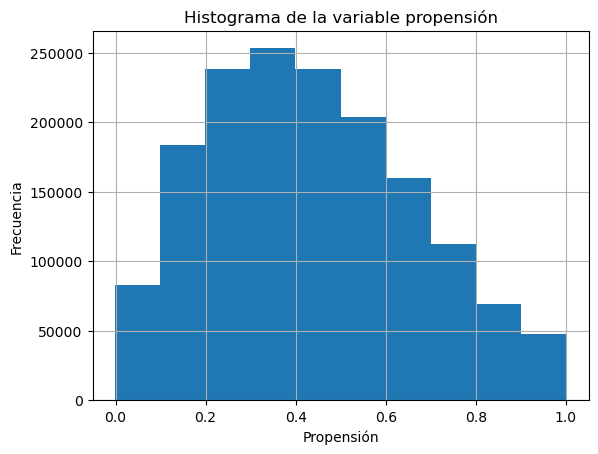

In [42]:
df2_4["propension"].hist()
plt.xlabel("Propensión")
plt.ylabel("Frecuencia")
plt.title("Histograma de la variable propensión")
plt.show()

**2.4.7 ¿Cuántos registros tienen una propensión entre 0.95 y 1.05?**

In [31]:
df2_4['prop_cond'] = np.where((df2_4['propension'] > 0.95) & (df2_4['propension'] < 1.05), 1, 0)
num_registros = (df2_4['prop_cond'] == 1).sum()
print("Hay " + str(num_registros) + " registros con una propensión entre 0.95 y 1.05.")



Hay 26631 registros con una propensión entre 0.95 y 1.05.


**2.4.8 ¿Cada factor $k$ a cuántos registros ha sido aplicado?**

In [48]:
df2_4['k'] = df2_4.apply(calculo_propension, axis=1)
grouped = df2_4.groupby('k').size()
print(f"El valor k = {k} se aplicó 1098562 veces")

El valor k = 1.0 se aplicó 1098562 veces


**2.4.9 La `propension` permite conocer si hay un alto o bajo riesgo de que el limite de la tarjeta pueda llegar a ser superado. Para ello es necesario identificar que registros son de alto riesgo y cuáles no. Crea una columna llamada `riesgo` que contenga los valores `alto riesgo` y `bajo riesgo`, se considera que un cliente es de `alto riesgo` si la propensión supera al porcentaje de uso.**

In [50]:
def determinar_riesgo(row):
    if row['propension'] > row['pct_uso']:
        return 'alto riesgo'
    else:
        return 'bajo riesgo'

df2_4['riesgo'] = df2_4.apply(determinar_riesgo, axis=1)
df2_4['riesgo']

0          bajo riesgo
1          bajo riesgo
2          bajo riesgo
3          bajo riesgo
4          bajo riesgo
              ...     
1589007    bajo riesgo
1589008    bajo riesgo
1589009    bajo riesgo
1589010    bajo riesgo
1589011    bajo riesgo
Name: riesgo, Length: 1589012, dtype: object

**2.4.10 Para priorizar acciones comerciales se desea marcar al 5% de los clientes con menor porcentaje de uso con la etiqueta `prioridad 1`, al 1% de los clientes con mayor porcentaje de uso como `prioridad 4`, al 21% de los clientes con mayor porcentaje de uso con `prioridad 3` y el resto con `prioridad 2`.
    El porcentaje de uso a utilizar debe ser agregado para cada cliente ¿cuántos clientes hay en cada grupo de prioridad?**

In [59]:
# Determinar los valores de corte para cada grupo de prioridad
pct_uso_prioridad_1 = df2_4['pct_uso'].quantile(0.05)
pct_uso_prioridad_2 = df2_4['pct_uso'].quantile(0.21)
pct_uso_prioridad_3 = df2_4['pct_uso'].quantile(0.99)

# Crear una nueva columna 'prioridad' y asignar la etiqueta correspondiente a cada cliente
df2_4['prioridad'] = 'prioridad 2'
df2_4.loc[df2_4['pct_uso'] < pct_uso_prioridad_1, 'prioridad'] = 'prioridad 1'
df2_4.loc[(df2_4['pct_uso'] >= pct_uso_prioridad_1) & (df2_4['pct_uso'] < pct_uso_prioridad_2), 'prioridad'] = 'prioridad 2'
df2_4.loc[(df2_4['pct_uso'] >= pct_uso_prioridad_2) & (df2_4['pct_uso'] < pct_uso_prioridad_3), 'prioridad'] = 'prioridad 3'
df2_4.loc[df2_4['pct_uso'] >= pct_uso_prioridad_3, 'prioridad'] = 'prioridad 4'
df2_4['prioridad']

402245     prioridad 1
73488      prioridad 1
711062     prioridad 1
1536641    prioridad 1
10588      prioridad 1
              ...     
706066     prioridad 4
1385554    prioridad 4
27344      prioridad 4
79965      prioridad 4
158894     prioridad 4
Name: prioridad, Length: 1589012, dtype: object

**2.4.11 La empresa ha decidido aplicar una comisión de un 1,5% a las tarjetas de alto riesgo sobre el importe disponible y una bonificación del 0,43% a las tarjetas de bajo riesgo sobre el importe dispuesto.**

    * ¿Cuál es el importe total recaudado por la empresa con este nuevo importe?
    * ¿Qué coste tiene para la empresa esta nueva bonificación?
    * ¿Ha resultado beneficioso para la empresa aplicar esta nueva medida?

In [61]:
df2_4['comision'] = df2_4.apply(lambda row: row['disponible'] * 0.015 if row['riesgo'] == 'alto riesgo' else 0, axis=1)
df2_4['bonificacion'] = df2_4.apply(lambda row: row['dispuesto'] * 0.0043 if row['riesgo'] == 'bajo riesgo' else 0, axis=1)
df2_4

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gr,propension,prop_cond,k,riesgo,prioridad,comision,bonificacion
402245,402245,12894682,669287183875,900.0,0.00,900.0,1,3,B,10.25,ausente,0.000000,C,1.000000,1,1.000000,alto riesgo,prioridad 1,13.5,0.000000
73488,73488,12470765,930951933630,2400.0,0.00,2400.0,2,2,B,10.25,contactado,0.000000,E,1.000000,1,1.000000,alto riesgo,prioridad 1,36.0,0.000000
711062,711062,12744860,149379905527,800.0,0.00,800.0,2,1,B,10.25,contactado,0.000000,B,1.000000,1,1.000000,alto riesgo,prioridad 1,12.0,0.000000
1536641,1536641,12844070,566295765120,1300.0,0.00,1300.0,2,1,B,10.25,contactado,0.000000,D,1.000000,1,1.000000,alto riesgo,prioridad 1,19.5,0.000000
10588,10588,12811586,794864790330,600.0,0.00,600.0,2,3,A,18.75,contactado,0.000000,A,1.000000,1,1.000000,alto riesgo,prioridad 1,9.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706066,706066,12633335,722608655953,1700.0,1851.30,0.0,1,1,A,18.75,ausente,108.900000,D,-0.000641,0,-0.000641,bajo riesgo,prioridad 4,0.0,7.960590
1385554,1385554,12465480,777473241735,500.0,547.11,0.0,2,1,B,10.25,contactado,109.422000,A,-0.001094,0,-0.001094,bajo riesgo,prioridad 4,0.0,2.352573
27344,27344,13114771,302086280523,700.0,767.82,0.0,2,1,B,10.25,contactado,109.688571,A,-0.000783,0,-0.000783,bajo riesgo,prioridad 4,0.0,3.301626
79965,79965,13213785,544227118447,1000.0,1104.82,0.0,2,1,A,18.75,contactado,110.482000,C,-0.000552,0,-0.000552,bajo riesgo,prioridad 4,0.0,4.750726


In [64]:
importe_recaudado = df2_4['comision'].sum()
importe_recaudado

378263.00655

In [65]:
coste = df2_4['bonificacion'].sum() - df2_4['comision'].sum()
coste

3440698.838716999

In [73]:
Diferencia_final = df2_4['comision'].sum() - df2_4['bonificacion'].sum()
Diferencia_final
print("Las perdidas resultantes son:", Diferencia_final)

Las perdidas resultantes son: -3440698.838716999


### Ejercicio 2.5

**La empresa se está planteando transformar ciertas tarjetas en préstamos. Para cuando los clientes lo soliciten será necesario disponer del cuadro de amortización resultante de realizar esta transformación. Para ello es necesario lo siguiente:**

* El importe del préstamo será el saldo dispuesto de la tarjeta +10% de comisión +5% del límite si la tarjeta no está sobredispuesta en este porcentaje.
* Se considerará un tipo de interés fijo del 2,75%, aunque debe poder elegirse otro.
* El plazo amortización será preestablecido en 5 años, pero podría modificarse.
* Se considera sistema de amortización francés (cuota fija) para amortización mensual.

**Con todo esto:**

**2.5.1. Se debe programar una función que genere un dataframe con el cuadro de amortización mensual dada la información anterior y la información de la tarjeta.**

**2.5.2 Con las condiciones prefijadas de antemano ¿cuál sería la cuota inicial que se pagaría por cada tarjeta?**

**2.5.3 Esta operación solo sería aprobada si la cuota resultante supone un importe inferior al límite de la tarjeta dividido entre 55 ¿qué porcentaje de tarjetas es susceptible de ser aprobado?**

**2.5.1. Se debe programar una función que genere un dataframe con el cuadro de amortización mensual dada la información anterior y la información de la tarjeta.**

In [43]:
def cuadro_amortizacion(df):
    df["importe_prestamo"] = df.apply(lambda row: row["dispuesto"] + row["dispuesto"]*0.1 + (row["limite"]*0.05 if row["dispuesto"]/row["limite"] < 0.05 else 0), axis=1)
    df["cuota"] = df.apply(lambda row: row["importe_prestamo"]* (0.0275*((1 + 0.0275)**60))/(((1 + 0.0275)**60)-1), axis=1)
    df["amortizacion"] = df.apply(lambda row: row["cuota"] - row["importe_prestamo"]*0.0275/12, axis=1)
    df["interes"] = df.apply(lambda row: row["importe_prestamo"]*0.0275/12, axis=1)
    relevantes_columnas = ["idcliente", "dispuesto", "limite", "importe_prestamo", "cuota" , "amortizacion", "interes"]
    cuadro_prestamos = df[relevantes_columnas]
    return cuadro_prestamos

cuadro_prestamos = cuadro_amortizacion(df)
cuadro_prestamos

,idcliente,dispuesto,limite,importe_prestamo,cuota,amortizacion,interes
0,13208123,53.72,900.0,59.092,2.022129,1.886710,0.135419
1,13001708,91.36,1100.0,100.496,3.438975,3.208672,0.230303
2,12518311,606.33,1600.0,666.963,22.823485,21.295029,1.528457
3,12809806,92.21,500.0,101.431,3.470971,3.238525,0.232446
4,12948369,497.81,1700.0,547.591,18.738574,17.483677,1.254896
...,...,...,...,...,...,...,...
1589007,13220348,802.20,1200.0,882.420,30.196428,28.174215,2.022213
1589008,12528552,268.97,1200.0,295.867,10.124574,9.446545,0.678029
1589009,13338376,385.08,1700.0,423.588,14.495189,13.524466,0.970722
1589010,12655633,2575.44,4900.0,2832.984,96.944762,90.452507,6.492255


**2.5.2 Con las condiciones prefijadas de antemano ¿cuál sería la cuota inicial que se pagaría por cada tarjeta?**

In [34]:
print(cuadro_prestamos["cuota"])

0           2.022129
1           3.438975
2          22.823485
3           3.470971
4          18.738574
             ...    
1589007    30.196428
1589008    10.124574
1589009    14.495189
1589010    96.944762
1589011    31.556810
Name: cuota, Length: 1589012, dtype: float64


**2.5.3 Esta operación solo sería aprobada si la cuota resultante supone un importe inferior al límite de la tarjeta dividido entre 55 ¿qué porcentaje de tarjetas es susceptible de ser aprobado?**

In [72]:
df["aprobado"] = df.apply(lambda row: row["cuota"] < (row["limite"]/55), axis=1)
porcentaje_aprobadas = df["aprobado"].mean() * 100
print("El porcentaje de tarjetas aprobadas es:", porcentaje_aprobadas, "%")


El porcentaje de tarjetas aprobadas es: 69.48053255733751 %


### Ejercicio 2.6

Cuando se utilizan técnicas estadísticas de análisis de la información a menudo es necesario que las variables que se están analizando verifiquen la hipótesis de Normalidad, esto es que su distribución de probabilidad pueda considerarse Normal. 

Sin embargo, esto no siempre se cumple, por lo que una de las posibles soluciones es transformar los datos de modo que su distribución se asemeje a la de una distribución de probabilidad Normal.

Para ello, se puede hacer uso de la familia de transformaciones de Box - Cox, que se define de la siguiente forma:
$$y^{(\lambda)}=\left\{
\begin{array}{ll}
\dfrac{(y+m)^\lambda-1}{\lambda} & \lambda \neq 0\\
\ln(y+m) & \lambda = 0\\
\end{array}\right.$$
donde el parámetro $\lambda$ ha de estimarse a partir de los datos y la constante $m$ se elige de forma que $y+m$ sea siempre positiva.

Se pide:
1. Programa una función que permita aplicar la transformación de Box - Cox sobre una columna de un `dataframe` de Pandas. Selecciona un valor para $\lambda$ y utilízalo para aplicar la transformación sobre la variable `dispuesto`. Aplícale también el valor 0.982.

1. Programa una función que permita obtener el valor $\lambda$ óptimo, con una precisión de dos decimales, al aplicar la familia de transformaciones Box - Cox sobre la variable `dispuesto` de forma que la variable se asemeje lo máximo posible a una distribución Normal. 

  Como criterio de Normalidad utiliza el estadístico de Jarque - Bera, de forma que cuanto menor sea, más próximo a la Normalidad se encontrará la variable.
  
  Para el cálculo del estadístico de Jarque - Bera haz uso de la función `jarque_bera` del paquete `scipy`
  
  ```
      from scipy.stats import jarque_bera
      x = np.array((1, 23, 4))
      jarque_bera_test = jarque_bera(x)
      jarque_bera_test.statistic
  ```
  
  En resumen, programa una función que calcule el valor $\lambda$ óptimo con una precisión de dos decimales que proporcione el valor mínimo del estadístico de Jarque - Bera.
1. Dibuja conjuntamente el histograma de la varible transformada y la variable sin transformar.
  

**2.6.1 Programa una función que permita aplicar la transformación de Box - Cox sobre una columna de un `dataframe` de Pandas. Selecciona un valor para $\lambda$ y utilízalo para aplicar la transformación sobre la variable `dispuesto`. Aplícale también el valor 0.982.**

In [35]:
import numpy as np
from scipy.stats import boxcox

def box_cox_transformation(df, col, lambda_value):
    col_bc = []
    for i in range(len(df)):
        y = boxcox(df[col].iloc[i], lambda_value)
        col_bc.append(y)
    return col_bc



In [36]:
df['dispuesto_normalizado'] = box_cox_transformation(df, 'dispuesto', 2)
df['dispuesto_normalizado']

0          1.442419e+03
1          4.172825e+03
2          1.838175e+05
3          4.250842e+03
4          1.239069e+05
               ...     
1589007    3.217619e+05
1589008    3.617193e+04
1589009    7.414280e+04
1589010    3.316445e+06
1589011    3.514065e+05
Name: dispuesto_normalizado, Length: 1589012, dtype: float64

In [37]:
df['dispuesto_normalizado'] = box_cox_transformation(df, 'dispuesto', 0.982)
df['dispuesto_normalizado']

0            49.900928
1            84.754748
2           549.166746
3            85.538338
4           452.301778
              ...     
1589007     723.240972
1589008     246.642706
1589009     351.271056
1589010    2275.885161
1589011     755.269544
Name: dispuesto_normalizado, Length: 1589012, dtype: float64

**2.6.2 Programa una función que permita obtener el valor $\lambda$ óptimo, con una precisiónd de dos decimales, al aplicar la familia de transformaciones Box - Cox sobre la variable `dispuesto` de forma que la variable se asemeje lo máximo posible a una distribución Normal.**

  Como criterio de Normalidad utiliza el estadístico de Jarque - Bera, de forma que cuanto menor sea, más próximo a la Normalidad se encontrará la variable.
  
  Para el cálculo del estadístico de Jarque - Bera haz uso de la función `jarque_bera` del paquete `scipy`
  
  ```
      from scipy.stats import jarque_bera
      x = np.array((1, 23, 4))
      jarque_bera_test = jarque_bera(x)
      jarque_bera_test.statistic
  ```
  
  **En resumen, programa una función que calcule el valor $\lambda$ óptimo con una precisión de dos decimales que proporcione el valor mínimo del estadístico de Jarque - Bera.**

In [38]:
def find_optimal_lambda(df, col):
    optimal_lambda = None
    min_jb = float('inf')
    lambda_values = np.linspace(0, 1, num=100) # Generamos un rango de valores de lambda
    for lambda_value in lambda_values:
        col_bc = boxcox(df[col] + 1, lambda_value) # Aplicamos la transformación Box-Cox
        jb = jarque_bera(col_bc)[0] # Calculamos el estadístico de Jarque-Bera
        if jb < min_jb: # Si el valor actual es menor al mínimo encontrado hasta el momento, actualizamos
            min_jb = jb
            optimal_lambda = round(lambda_value, 2) # Redondeamos el valor a dos decimales
    return optimal_lambda

df['dispuesto_bc'] = boxcox(df['dispuesto'] +1, find_optimal_lambda(df, 'dispuesto'))
df['dispuesto_bc']


0           7.381314
1           9.110271
2          17.916814
3           9.142843
4          16.764491
             ...    
1589007    19.666243
1589008    13.552772
1589009    15.356872
1589010    28.633888
1589011    19.954381
Name: dispuesto_bc, Length: 1589012, dtype: float64

In [39]:
lambda_optimo_dispuesto = find_optimal_lambda(df, 'dispuesto')
lambda_optimo_dispuesto

0.28

**2.6.3 Dibuja conjuntamente el histograma de la varible transformada y la variable sin transformar.** 

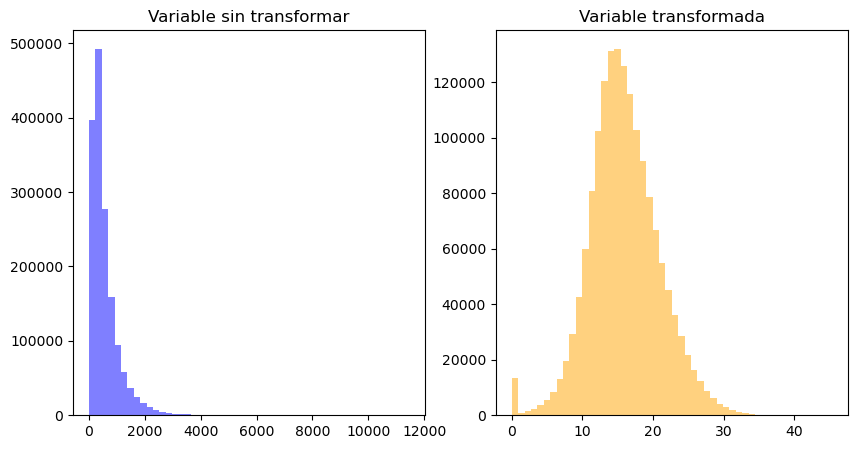

In [40]:
# Crea una figura y dos ejes (ax1 y ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Dibuja el histograma de la variable sin transformar en el primer eje (ax1)
ax1.hist(df['dispuesto'], bins=50, color='blue', alpha=0.5)
ax1.set_title('Variable sin transformar')

# Dibuja el histograma de la variable transformada en el segundo eje (ax2)
ax2.hist(df['dispuesto_bc'], bins=50, color='orange', alpha=0.5)
ax2.set_title('Variable transformada')

# Muestra el gráfico
plt.show()
